## sw

Developent of mse

$\frac{1}{2} \hat{\frac{\delta {h ^ \prime} ^2}{\delta t}} = \hat{h^ \prime} \ \text{NetLW} ^ \prime + \hat{h^ \prime} \ \text{SEF} ^ \prime + \hat{h^ \prime} \ \textcolor{lightblue}{\text{NetSW}} ^ \prime - \hat{h^ \prime} \ \nabla_{h}\cdot \hat{\overrightarrow{u}h}$

$\textcolor{lightblue}{\text{NetSW}} = \textcolor{lightblue}{\text{rsus}} - \textcolor{lightblue}{\text{rsds}} - \textcolor{lightblue}{\text{rsut}}$

In [1]:
import xarray as xr

import numpy as np
import skimage.measure as skm

import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeat

import os

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [2]:
model='MPI-ESM1-2-HR'
experiment_id='historical'
folder = '/Users/cbla0002/Documents/data/cmip6/' + model

In [3]:
fileName = model + '_sw_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)

In [4]:
def plot_snapshot(var, cmap, variable_name, model):
    projection = ccrs.PlateCarree(central_longitude=180)
    lat = var.lat
    lon = var.lon

    f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(15, 5))

    var.plot(transform=ccrs.PlateCarree(), cbar_kwargs={'orientation': 'horizontal','pad':0.125, 'aspect':50,'fraction':0.055}, cmap=cmap)
    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())
    ax.set_title(variable_name + ' snapshot, model:' + model)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])
    ax.set_yticks([-20, 0, 20])
    plt.tight_layout()

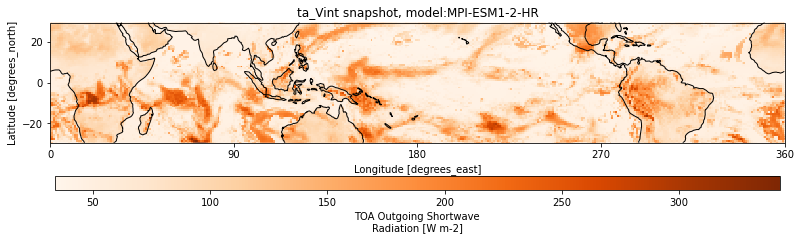

In [10]:
plot_snapshot(ds.rsut_day.isel(time=0), 'Oranges', 'ta_Vint', model)

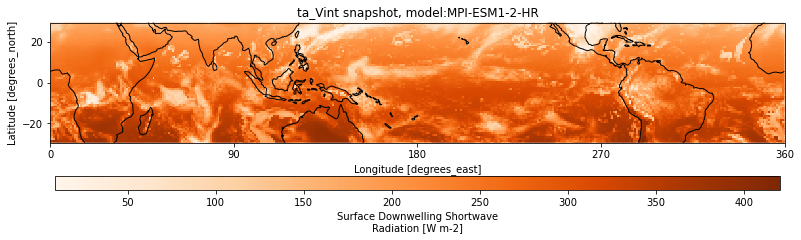

In [11]:
plot_snapshot(ds.rsds_day.isel(time=0), 'Oranges', 'ta_Vint', model)

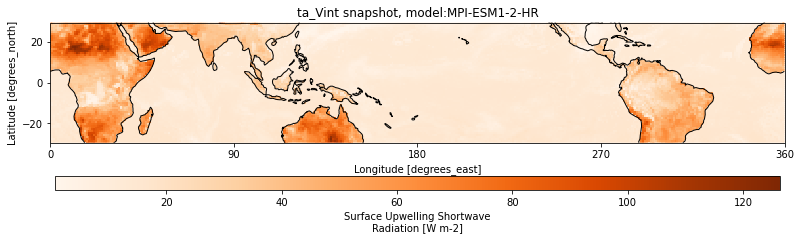

In [12]:
plot_snapshot(ds.rsus_day.isel(time=0), 'Oranges', 'ta_Vint', model)

In [14]:
netsw = ds.rsds_day.isel(time=0) + ds.rsus_day.isel(time=0) - ds.rsut_day.isel(time=0)

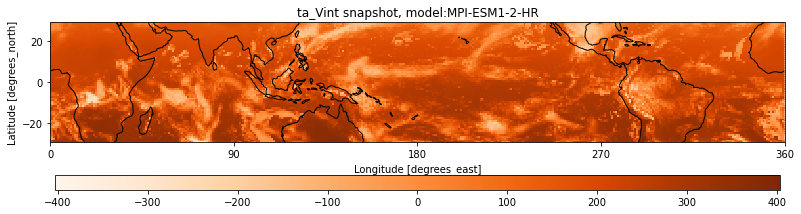

In [15]:
plot_snapshot(netsw, 'Oranges', 'ta_Vint', model)